In [42]:
%pylab inline


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.kernel.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


In [43]:
import numpy as np
import pandas as pd
import pylab as pl

In [24]:
from sklearn.utils import murmurhash3_32

In [25]:
n_groups = 100
n_samples = 100000

group_id = np.asarray(np.random.randint(n_groups, size=n_samples), dtype=np.int32)
data = np.random.normal(size=n_samples)

df = pd.DataFrame({'group_id': group_id, 'data': data})

In [105]:
%time grouped = df.groupby('group_id')
%time aggregate = grouped.sum()

aggregate[:10]

CPU times: user 253 µs, sys: 16 µs, total: 269 µs
Wall time: 271 µs
CPU times: user 4.9 ms, sys: 474 µs, total: 5.37 ms
Wall time: 4.86 ms


data
group_id           
0          4.974845
1        -50.376857
2          5.168091
3          6.355739
4         22.481601
5         -0.748311
6        -73.982681
7          4.263864
8         43.841003
9         14.636269

In [27]:
murmurhash3_32(df.group_id, 0) % 4

array([1, 2, 3, ..., 0, 1, 2], dtype=int32)

In [28]:
from IPython.parallel import Client
client = Client()
len(client)

4

In [29]:
from sklearn.utils import gen_even_slices

list(gen_even_slices(100, 4))[2]

slice(50, 75, None)

# Python sorting timings

In [30]:
import numpy as np

In [58]:
n_samples = int(1e7)

In [59]:
a = np.random.normal(size=n_samples)
%time a.sort()

CPU times: user 1.02 s, sys: 1.87 ms, total: 1.02 s
Wall time: 1.02 s


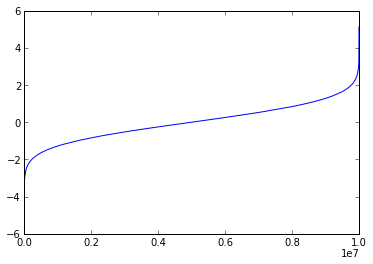

In [60]:
_ = pl.plot(a)

In [61]:
b = np.random.normal(size=n_samples)
%time b.sort()

CPU times: user 1e+03 ms, sys: 1.43 ms, total: 1 s
Wall time: 1 s


In [98]:
c = np.r_[a[:n_samples / 2], b[:n_samples / 2]]

(10000000,)

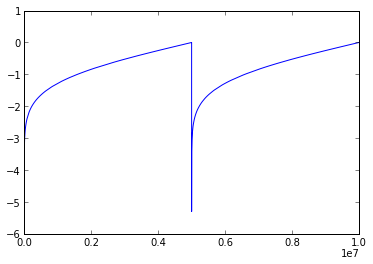

In [99]:
_ = pl.plot(c)
c.shape

In [100]:
c.nbytes / 1e6

80.0

In [101]:
%time c.sort()

CPU times: user 664 ms, sys: 1.61 ms, total: 666 ms
Wall time: 665 ms


In [102]:
%load_ext cython

The cython module is not an IPython extension.


In [103]:
# TODO: implement merge of sorted collections